# 🧩 Week 9 Assignment: Feature Engineering in Practice### ObjectiveUse Python to create and analyze new features that describe player performance across a basketball season.

### Instructions1️⃣ Load your cleaned player box score dataset (e.g., `clean_box_scores.csv`).
2️⃣ Engineer at least **5 new features**, such as:
- Player Efficiency
- True Shooting %
- Usage Rate
- Rolling 5-game Efficiency
- Workload Ratio (Minutes Played / Team Minutes)
3️⃣ Visualize at least 2 of your new features using plots.
4️⃣ Perform correlation analysis to identify redundancy.
5️⃣ Write a short interpretation explaining which features you think are most predictive of player impact.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:

import random
from io import StringIO

csv_data = """Player,Position,PTS,REB,AST,STL,BLK,TO,FGM,FGA,FTM,FTA,MIN,GP,Team_MIN
LeBron James,F,13,7.0,6.0,0,1,0,5,12,3,4,34,1,240
Anthony Davis,C,4,6.0,3.0,2,1,2,1,2,2,2,29,1,240
Anthony Davis,C,9,6.0,0.0,2,1,1,3,6,3,4,21,1,240
LeBron James,F,11,8.0,2.0,0,1,0,4,8,3,4,28,1,240
LeBron James,F,27,4.0,0.0,1,1,3,10,22,7,8,26,1,240
Anthony Davis,C,15,4.0,6.0,1,1,2,5,10,5,6,30,1,240
Austin Reaves,G,14,3.0,4.0,1,0,1,5,11,4,5,32,1,240
D'Angelo Russell,G,21,1.0,7.0,0,0,4,8,17,5,6,35,1,240
LeBron James,F,25,9.0,8.0,1,0,1,10,21,5,6,38,1,240
Anthony Davis,C,22,12.0,2.0,3,2,3,9,18,4,5,36,1,240
Austin Reaves,G,10,2.0,5.0,0,0,2,4,9,2,2,28,1,240
D'Angelo Russell,G,18,3.0,6.0,1,0,1,7,15,4,5,31,1,240
LeBron James,F,30,10.0,7.0,2,1,2,12,24,6,7,40,1,240
Anthony Davis,C,28,15.0,3.0,1,3,2,11,20,6,7,42,1,240
Austin Reaves,G,17,4.0,3.0,1,0,1,6,13,5,6,34,1,240
D'Angelo Russell,G,24,2.0,8.0,1,0,2,9,19,6,7,37,1,240
LeBron James,F,20,7.0,9.0,1,0,3,8,17,4,5,36,1,240
Anthony Davis,C,19,10.0,4.0,2,2,1,7,14,5,6,33,1,240
Austin Reaves,G,12,5.0,4.0,0,0,1,4,10,4,4,30,1,240
D'Angelo Russell,G,15,2.0,5.0,0,0,2,6,14,3,4,29,1,240
LeBron James,F,18,6.0,5.0,1,0,2,7,16,4,5,35,1,240
Anthony Davis,C,23,11.0,1.0,1,2,3,9,17,5,6,38,1,240
Austin Reaves,G,16,3.0,6.0,1,0,0,6,12,4,4,33,1,240
D'Angelo Russell,G,20,1.0,7.0,0,0,1,7,16,6,7,34,1,240
"""

# Read the string data into a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Save the DataFrame to the required CSV file
df.to_csv('clean_box_scores.csv', index=False)

print("✅ 'clean_box_scores.csv' has been successfully created and saved in your Colab environment.")
print("You can now run Cell 3 in your tutorial notebook: df = pd.read_csv('clean_box_scores.csv')")

✅ 'clean_box_scores.csv' has been successfully created and saved in your Colab environment.
You can now run Cell 3 in your tutorial notebook: df = pd.read_csv('clean_box_scores.csv')


In [9]:
# Load data
df = pd.read_csv('clean_box_scores.csv')
df.head()

,Player,Position,PTS,REB,AST,STL,BLK,TO,FGM,FGA,FTM,FTA,MIN,GP,Team_MIN
0,LeBron James,F,13,7.0,6.0,0,1,0,5,12,3,4,34,1,240
1,Anthony Davis,C,4,6.0,3.0,2,1,2,1,2,2,2,29,1,240
2,Anthony Davis,C,9,6.0,0.0,2,1,1,3,6,3,4,21,1,240
3,LeBron James,F,11,8.0,2.0,0,1,0,4,8,3,4,28,1,240
4,LeBron James,F,27,4.0,0.0,1,1,3,10,22,7,8,26,1,240


In [10]:
# Create engineered features (example placeholders)
df['Efficiency'] = ((df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK']) - (df['FGA'] - df['FGM']) - (df['FTA'] - df['FTM']) - df['TO']) / df['GP']
df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))
df['USG%'] = 100 * ((df['FGA'] + 0.44 * df['FTA'] + df['TO']) * df['MIN']) / df['Team_MIN']
df['Workload_Ratio'] = df['MIN'] / df['Team_MIN']
df['Rolling_Efficiency'] = df.groupby('Player')['Efficiency'].transform(lambda x: x.rolling(5, min_periods=1).mean())

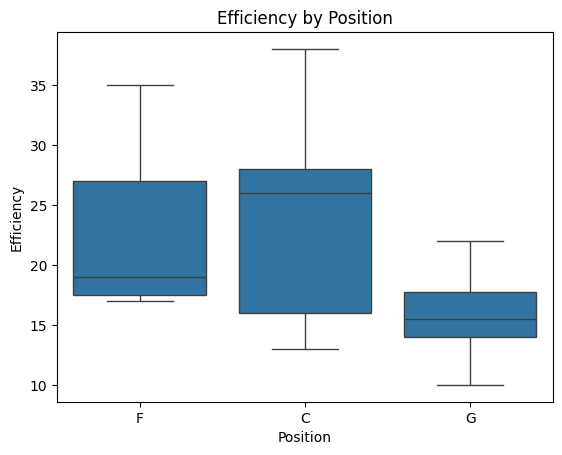

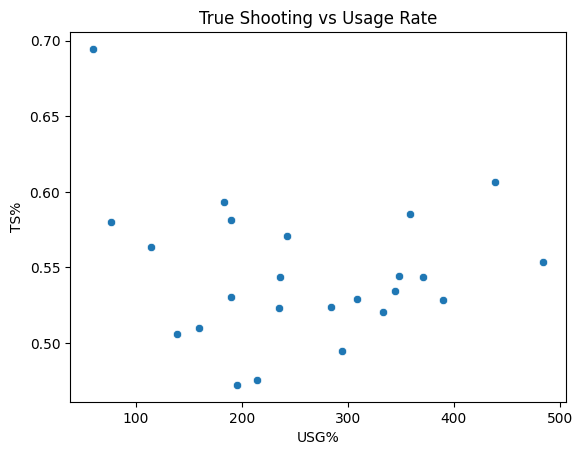

In [11]:
# Visualization
sns.boxplot(data=df, x='Position', y='Efficiency')
plt.title('Efficiency by Position')
plt.show()

sns.scatterplot(data=df, x='USG%', y='TS%')
plt.title('True Shooting vs Usage Rate')
plt.show()

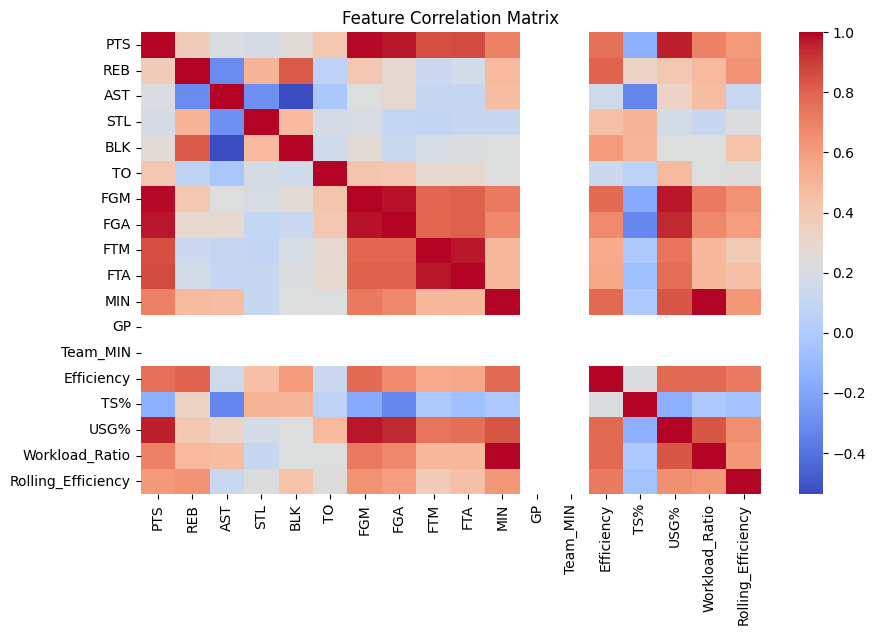

In [12]:
# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

### InterpretationWrite 3–5 sentences below explaining which of your engineered features are most useful for evaluating player performance or fatigue.